<h>**Problem**</h></br>
In 2026, the wealthiest individual human is Elon Musk, whose net worth has soared from an already staggering 28 billion at the start of 2020 [1] to a breathtaking $684 billion today [2]. In 2025, he won a pay package that will pay him a trillion dollars over the course of ten years, if he succeeds in meeting certain goals [3]. Assuming he met those requirements, his net worth will be at least 1,684 billion dollars in 2035. This notebook will analyze fat tails in financial data, focusing specifically on outliers like Elon Musk. The central question being answered by this notebook is: Do Americans' net worths follow a powerlaw distribution?

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd
from scipy import stats
import seaborn as sns

<h>**Model**</h></br>
I'll compare the graph of American citizens' net worths (or yearly income, depending on convenience of data collection) with a *power-law distribution*. On statisticshowto.com, the power-law is described as follows: "The power law (also called the scaling law) states that a relative change in one quantity results in a proportional relative change in another. The simplest example of the law in action is a square; if you double the length of a side (say, from 2 to 4 inches) then the area will quadruple (from 4 to 16 inches squared)." [4]

"An example power-law graph that demonstrates ranking of popularity. To the right is the long tail, and to the left are the few that dominate (also known as the 80–20 rule)." [5]

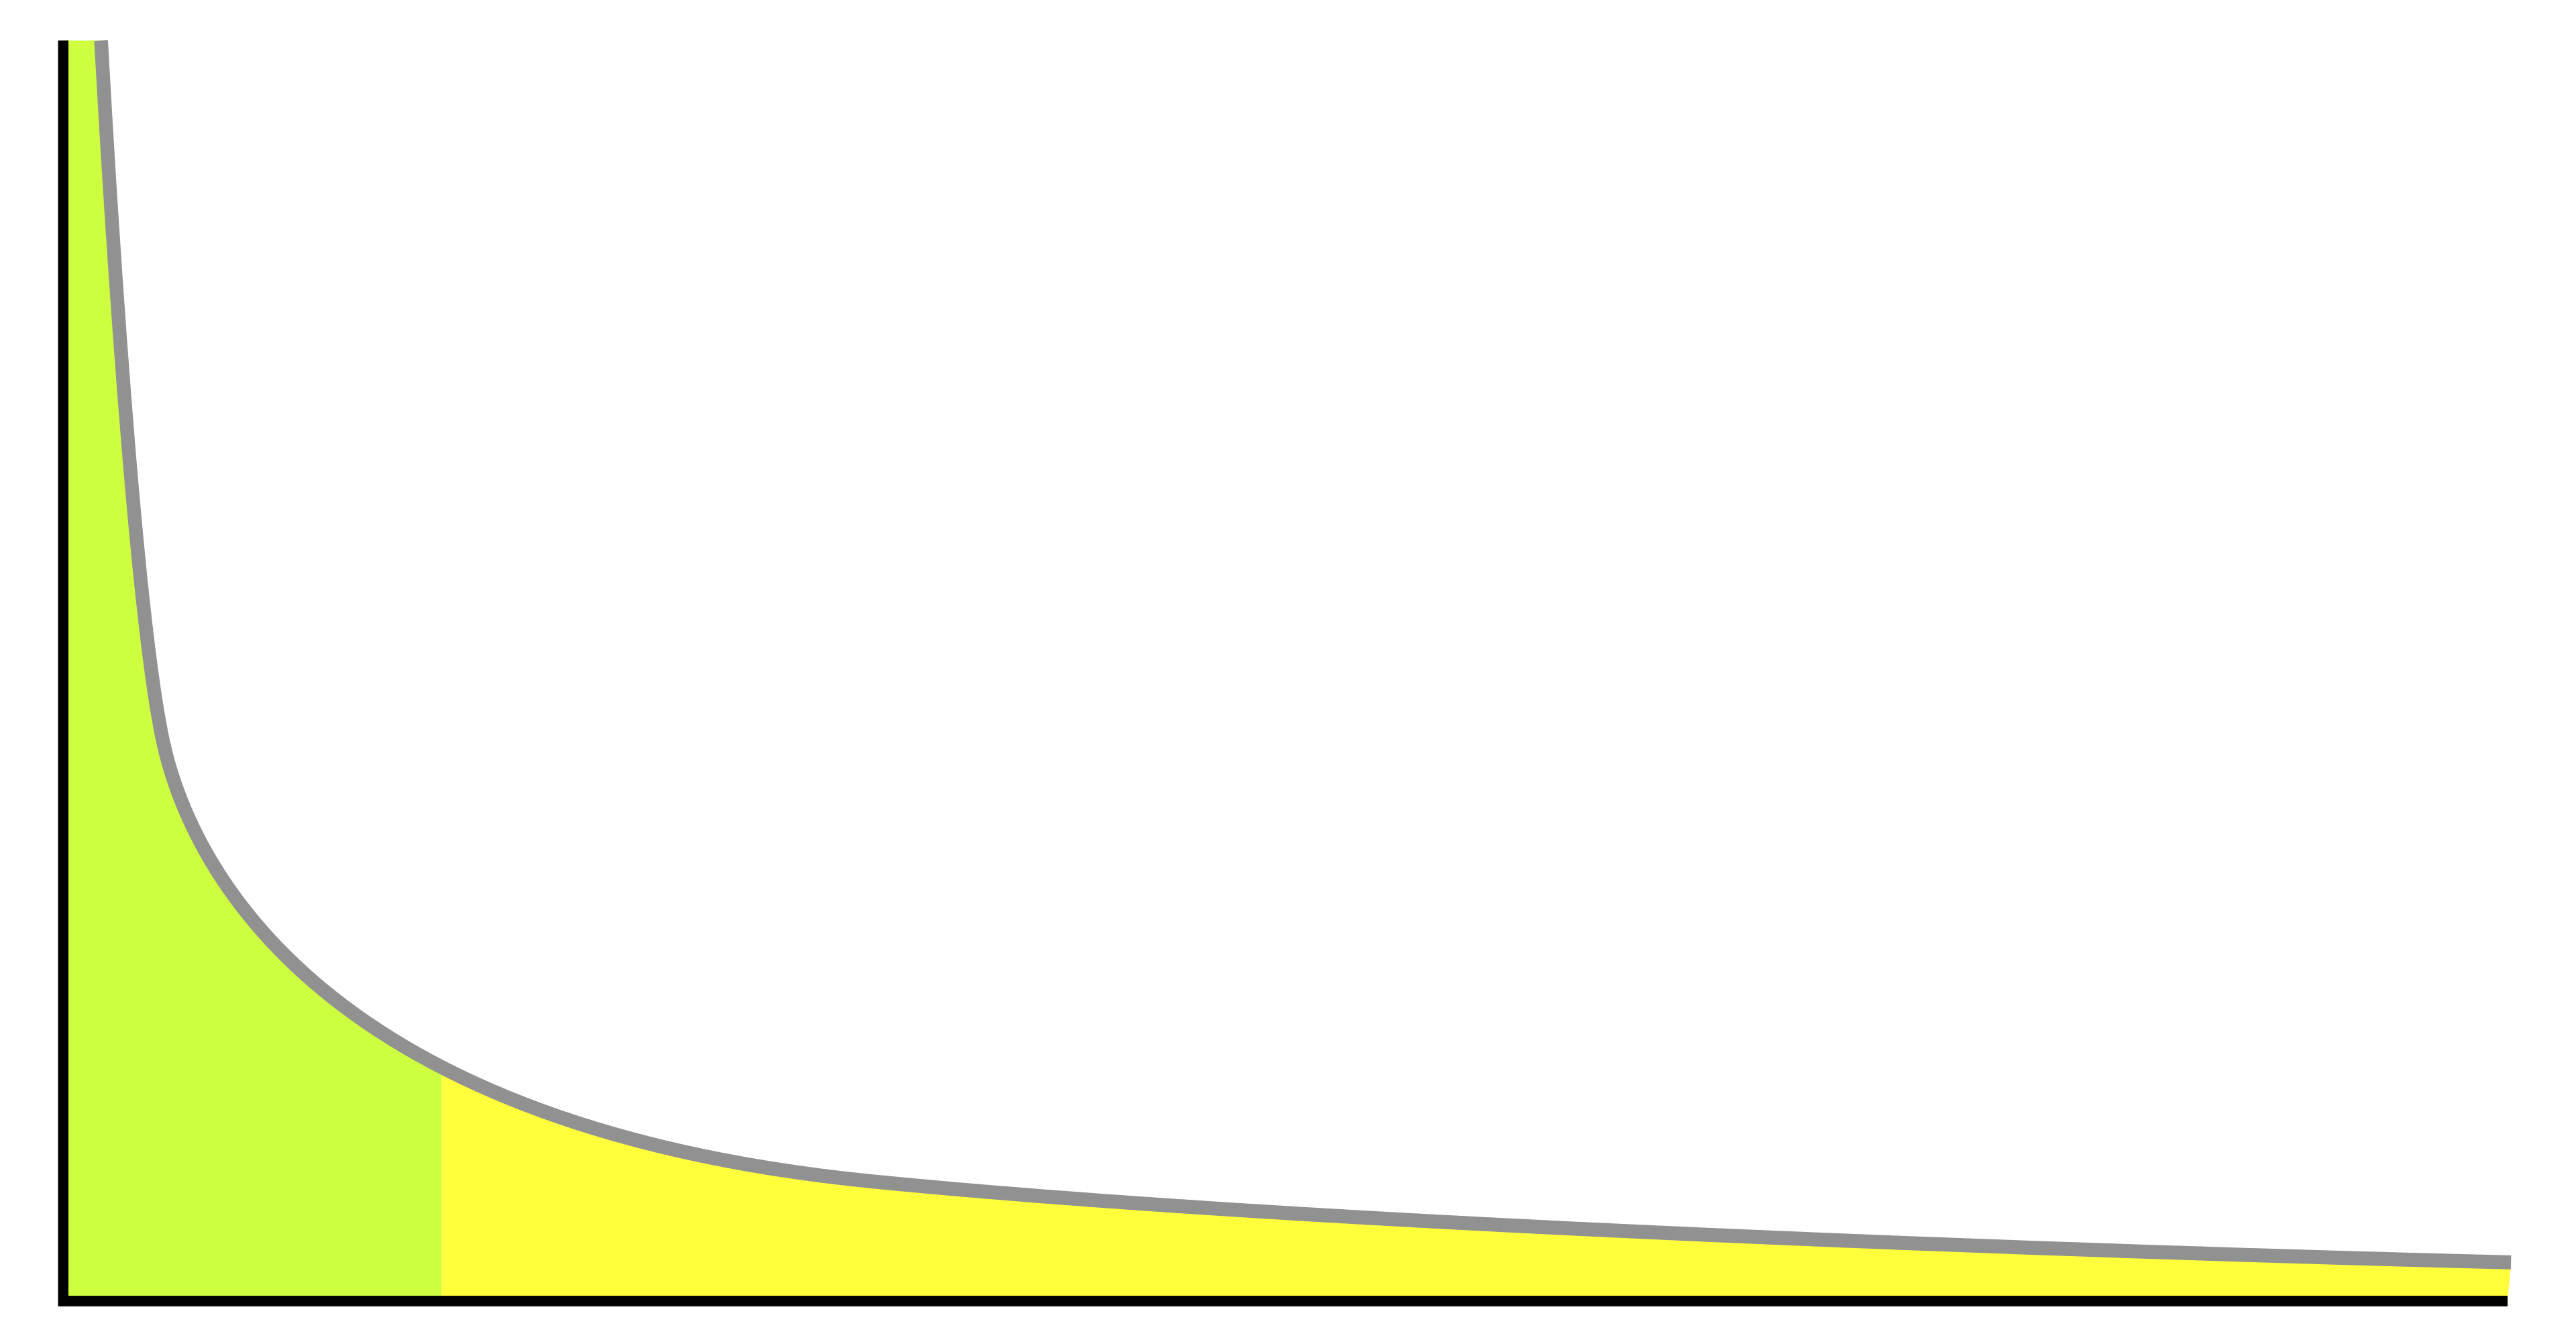

<h>**Data**</h></br>
One dataset on Americans' net worths is the US Census Bureau's 2024 Survey of Income and Program Participation (https://dqydj.com/net-worth-percentiles/).

Looking at the histogram on the webpage, we can see that a huge majority of the wealth lies in the 99th percentile. This distribution makes me think it could be a power-law, since the overwhelming majority of data points should lie very close to 0, but rare cases should pop up at enormously high values.

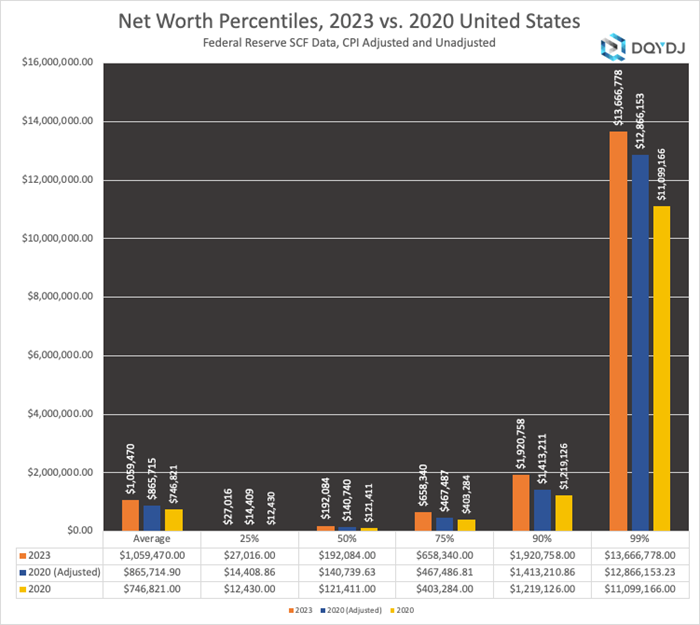

<h>**Computation**</h></br>
This is the section where I'll plot the data and compare it with a power-law distribution. First, let's start with an example of a power-law distribution.

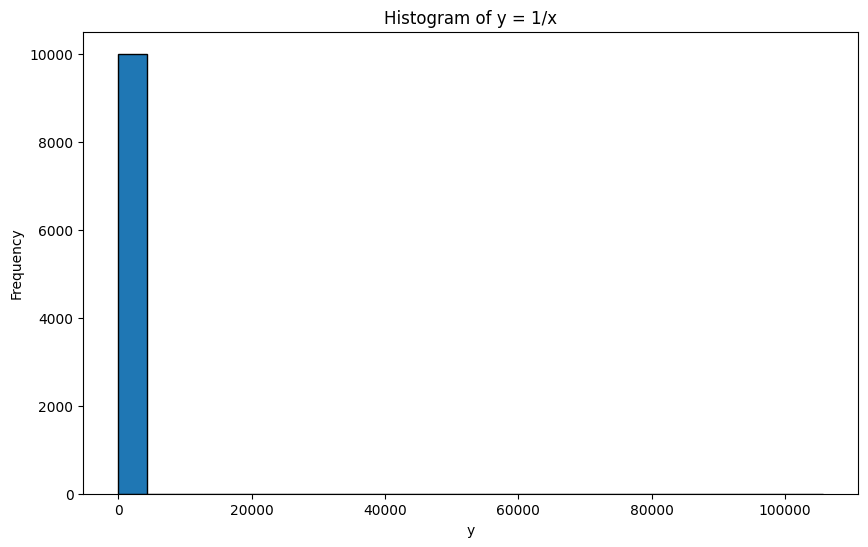

Minimum y: 1.0001238360994649
Maximum y: 105695.9510605202


In [207]:
# Here's an example of something that does correspond with a power-law distribution
# The reciprocals of random numbers between 0 and 1.
import pandas as pd

x = np.random.uniform(0, 1, 10000)
y = 1/x
plt.figure(figsize=(10, 6))
plt.hist(y, bins=25, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y = 1/x')
plt.show()

print(f"Minimum y: {np.min(y)}")
print(f"Maximum y: {np.max(y)}")

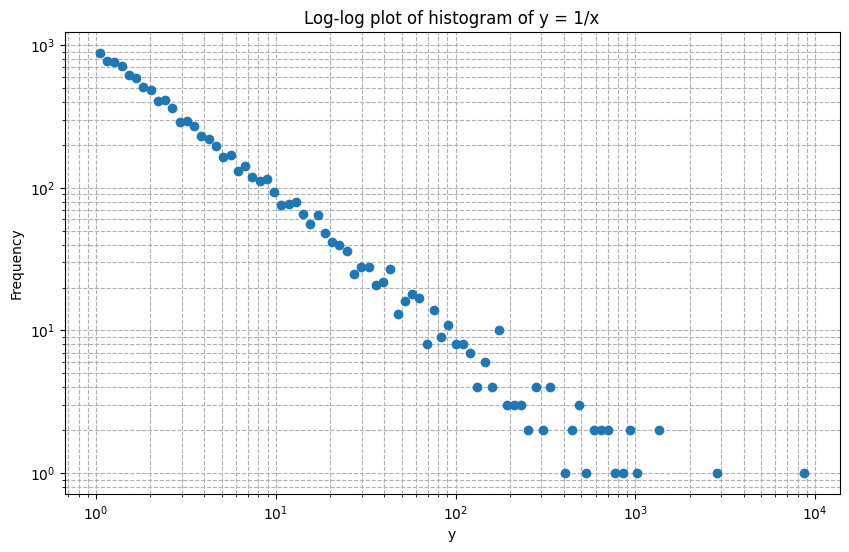

In [208]:
# If we plot it on a log-log graph the relationship becomes clear
bins = np.logspace(0, 4, 100)
counts, bin_edges = np.histogram(y, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

mask = counts > 0
bin_centers_nonzero = bin_centers[mask]
counts_nonzero = counts[mask]

plt.figure(figsize=(10, 6))
plt.loglog(bin_centers_nonzero, counts_nonzero, marker='o', linestyle='None')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Log-log plot of histogram of y = 1/x')
plt.grid(True, which="both", ls="--")
plt.show()

In [209]:
# Lets compare that with the data found in the US Census Bureau's
# net worths review

import pandas as pd

df = pd.read_csv('SCFP2022.csv')
df.head()

import numpy as np

# 1. Let's extract the ASSET column
assets = df['ASSET']

# 2. Convert to numeric, coercing errors so that they'll be shown as NaN (Not a Number)
assets = pd.to_numeric(assets, errors='coerce')

# 3. Fill NaN values with 0
assets = assets.fillna(0)

# 4. Filter for positive values
assets[assets < 0] = 0

print("Shape of assets_positive:", assets.shape)

# 5. Display descriptive statistics for assets_positive
print("\nStatistics for positive ASSET values:")
print(assets.describe())

Shape of assets_positive: (22975,)

Statistics for positive ASSET values:
count        22975.00
mean      20317046.26
std      110925570.29
min              0.00
25%          63850.00
50%         539800.00
75%        2716900.00
max     2387780900.00
Name: ASSET, dtype: float64


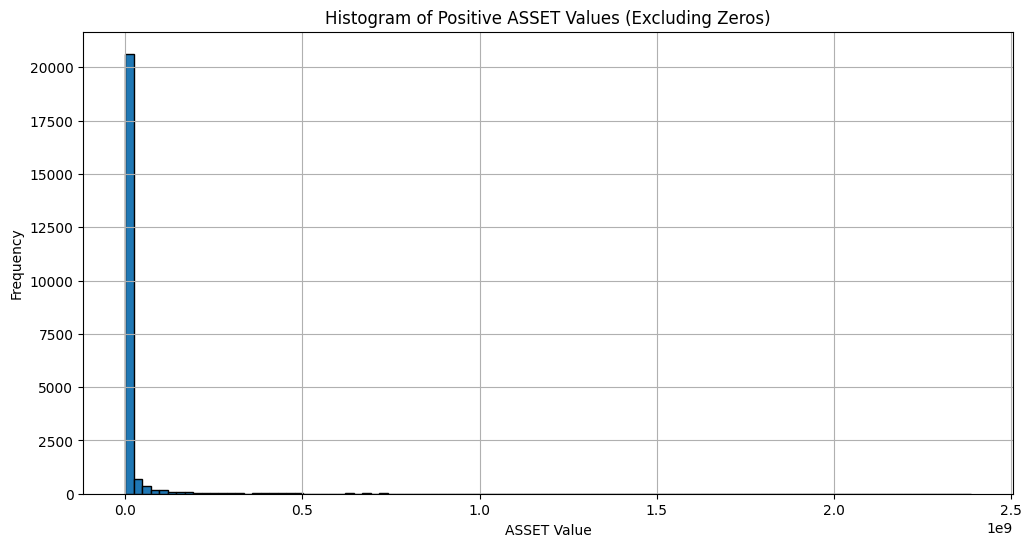

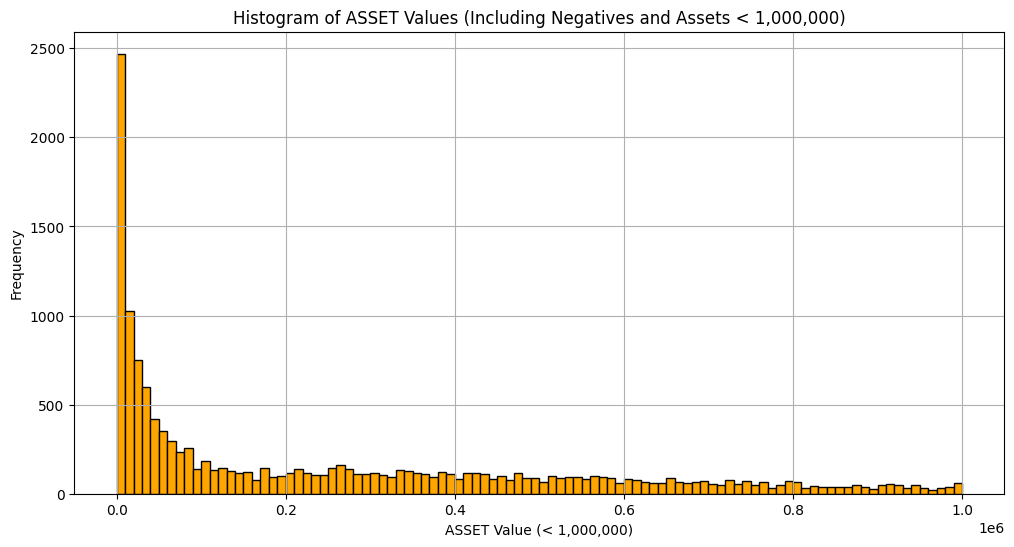

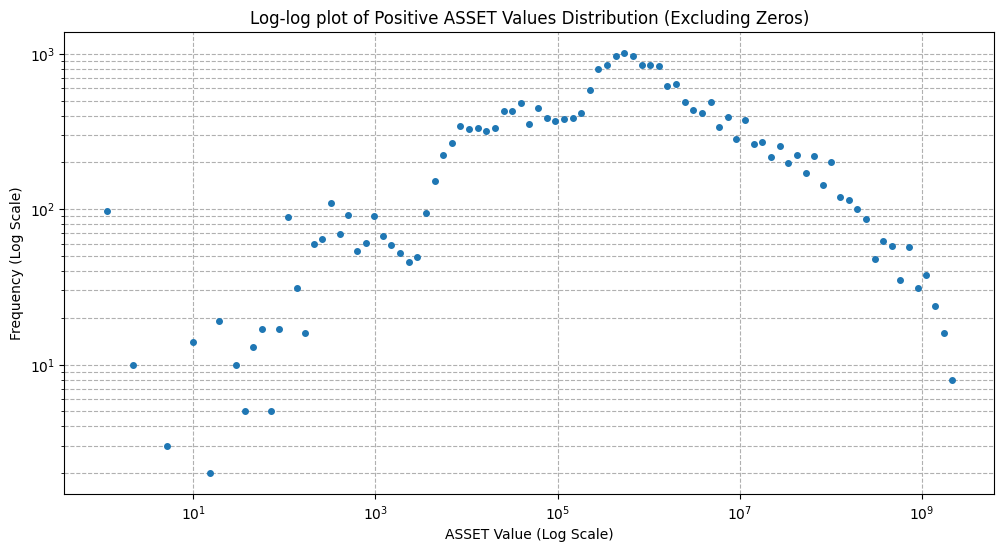

Minimum ASSETS (for log plot): 1.0
Maximum ASSETS (for log plot): 2387780900.0

Stats:
             assets
count      22870.00
mean    20410325.22
std    111171365.99
min            1.00
25%        66202.50
50%       546445.00
75%      2749000.00
max   2387780900.00


In [210]:
# Filter out zero values for the log-log plot to avoid log(0)
assets_for_log_plot = assets[assets > 0]

# 1. Create a histogram of the assets_positive data
plt.figure(figsize=(12, 6))
plt.hist(assets_for_log_plot, bins=100, edgecolor='black')
plt.xlabel('ASSET Value')
plt.ylabel('Frequency')
plt.title('Histogram of Positive ASSET Values (Excluding Zeros)')
plt.grid(True)
plt.show()

# Create a histogram for assets < 1,000,000
assets_under_million = assets[assets < 1_000_000]
plt.figure(figsize=(12, 6))
plt.hist(assets_under_million, bins=100, edgecolor='black', color='orange')
plt.xlabel('ASSET Value (< 1,000,000)')
plt.ylabel('Frequency')
plt.title('Histogram of ASSET Values (Including Negatives and Assets < 1,000,000)')
plt.grid(True)
plt.show()

# 2. Define logarithmically spaced bins for assets_positive
bins_log = np.logspace(np.log10(assets_for_log_plot.min()), np.log10(assets_for_log_plot.max()), 100)

# 3. Compute the histogram counts and bin edges for assets_positive using the logarithmically spaced bins
counts_log, bin_edges_log = np.histogram(assets_for_log_plot, bins=bins_log)

# 4. Calculate the center of each bin for plotting.
bin_centers_log = (bin_edges_log[:-1] + bin_edges_log[1:]) / 2

mask_log = counts_log > 0
bin_centers_nonzero_log = bin_centers_log[mask_log]
counts_nonzero_log = counts_log[mask_log]

# 5. Create a log-log plot
plt.figure(figsize=(12, 6))
plt.loglog(bin_centers_nonzero_log, counts_nonzero_log, marker='o', linestyle='None', markersize=4)
plt.xlabel('ASSET Value (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Log-log plot of Positive ASSET Values Distribution (Excluding Zeros)')
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Minimum ASSETS (for log plot): {np.min(assets_for_log_plot)}")
print(f"Maximum ASSETS (for log plot): {np.max(assets_for_log_plot)}")

print("\nStats:")

#print stats in regular notation
data = {
    'assets': assets_for_log_plot
}
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.DataFrame(data)
print(df.describe())


Weird! The histogram of the assets looks very similar to the reciprocals histogram, but the log log graph doesn't look like it at all. Lets think about what that graph is telling us though.</br></br>

The highest frequency is about midway between 10^5 and 10^7, meaning we can estimate it at about 10^6 or 100,000. To the right of this peak, the graph *does* look like the power-law graph we saw with the reciprocals. To the left of the peak, however, the data is actually ascending, and looks quite scattered. If you look at the histogram, what you'll notice is that all that data to the left of the peak is represented by the data contained between 0 and 0.1 there. The scattering is telling us that there is a lot of variability between net worths of 0 and 100,000, and that while the bucket of people with net worths between 0 and 10,000 may be the largest, the power-law distribution does not actually hold up there - i.e. it is not more common to have a net worth of 0 than 1,000, or 10,000.</br></br>

It makes intuitive sense that the power-law should fail to apply at that level, since including things like TVs, cars or refrigerators in your net worth should push most people above absolute zero, even if they own no property of the sort that accumulates value. Let's display the data in a few more ways to see if we can draw any conclusions.

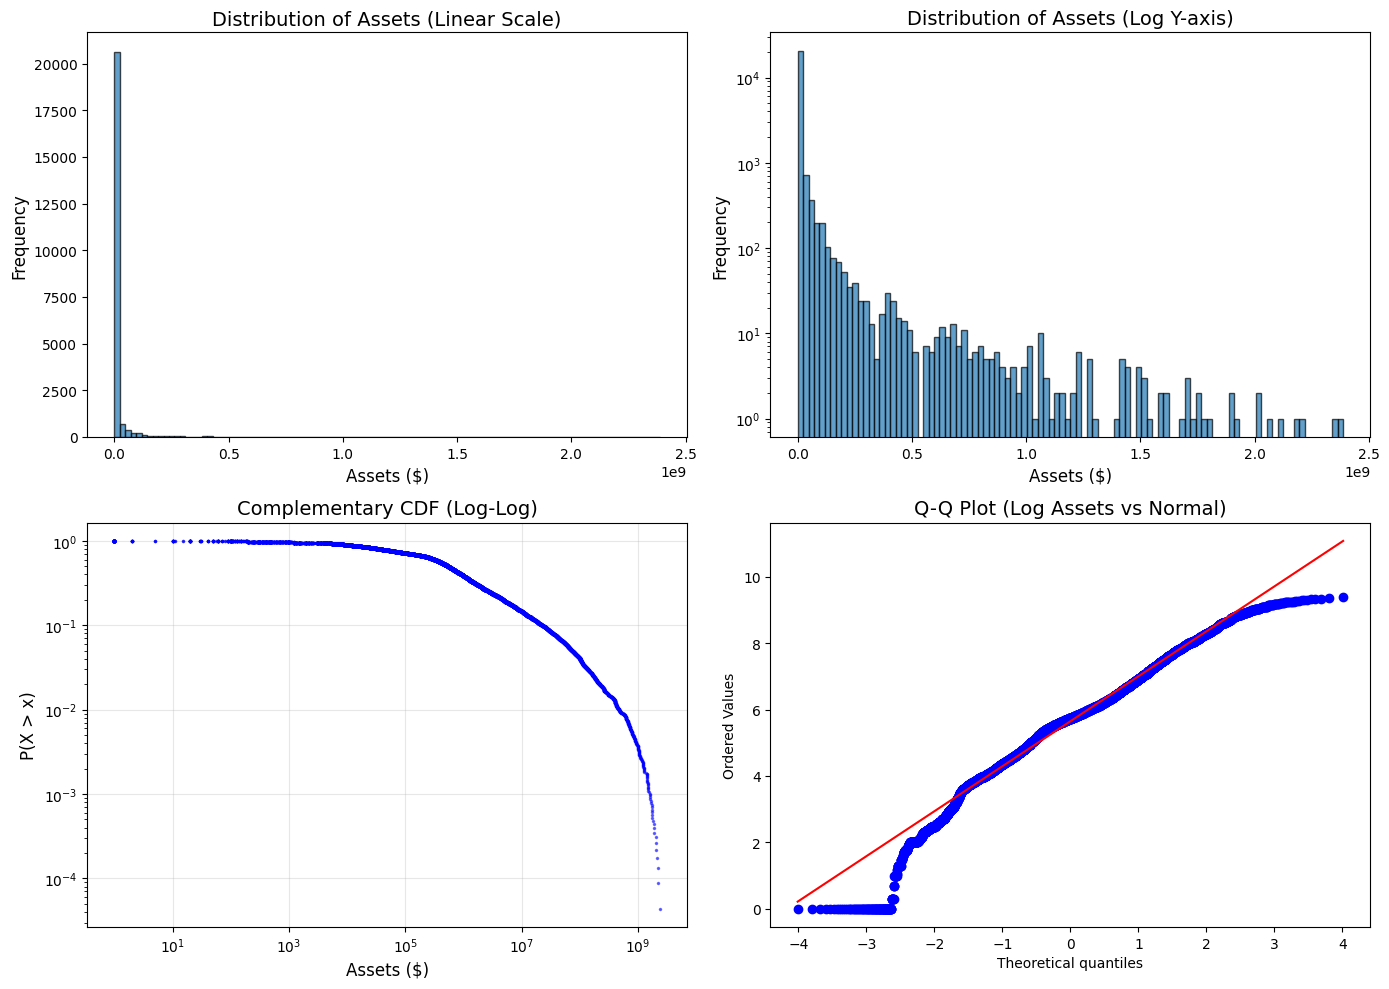

In [211]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
df_clean = df[df['assets'] > 0].copy()  # Remove zero/negative assets

# 1. Histogram (linear scale)
axes[0,0].hist(df_clean['assets'], bins=100, alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Assets ($)', fontsize=12)
axes[0,0].set_ylabel('Frequency', fontsize=12)
axes[0,0].set_title('Distribution of Assets (Linear Scale)', fontsize=14)

# 2. Histogram (log scale)
axes[0,1].hist(df_clean['assets'], bins=100, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Assets ($)', fontsize=12)
axes[0,1].set_ylabel('Frequency', fontsize=12)
axes[0,1].set_yscale('log')
axes[0,1].set_title('Distribution of Assets (Log Y-axis)', fontsize=14)

# 3. Complementary CDF (survival function) - log-log
sorted_assets = np.sort(df_clean['assets'])
ccdf = 1 - np.arange(1, len(sorted_assets)+1) / len(sorted_assets)
axes[1,0].loglog(sorted_assets, ccdf, 'b.', alpha=0.5, markersize=3)
axes[1,0].set_xlabel('Assets ($)', fontsize=12)
axes[1,0].set_ylabel('P(X > x)', fontsize=12)
axes[1,0].set_title('Complementary CDF (Log-Log)', fontsize=14)
axes[1,0].grid(True, alpha=0.3)

# 4. Q-Q plot against normal distribution
stats.probplot(np.log10(df_clean['assets']), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Log Assets vs Normal)', fontsize=14)

plt.tight_layout()
plt.show()

As you can see in the log y-axis graph, the tail is much longer than expected in a normal distribution. The Q-Q plot also looks strange, with the path diverging below the normal at either end. When you look at the Complementary CDF (complementary meaning that we're seeing the odds of a value *higher* than the value at the y-axis, instead of lower), you can see clearly that the relationship is exponential, not normal. Let's compare the smooth curve that we see with the info we can find on Wikipedia [6]:

Cumulative distribution function for the exponential distribution

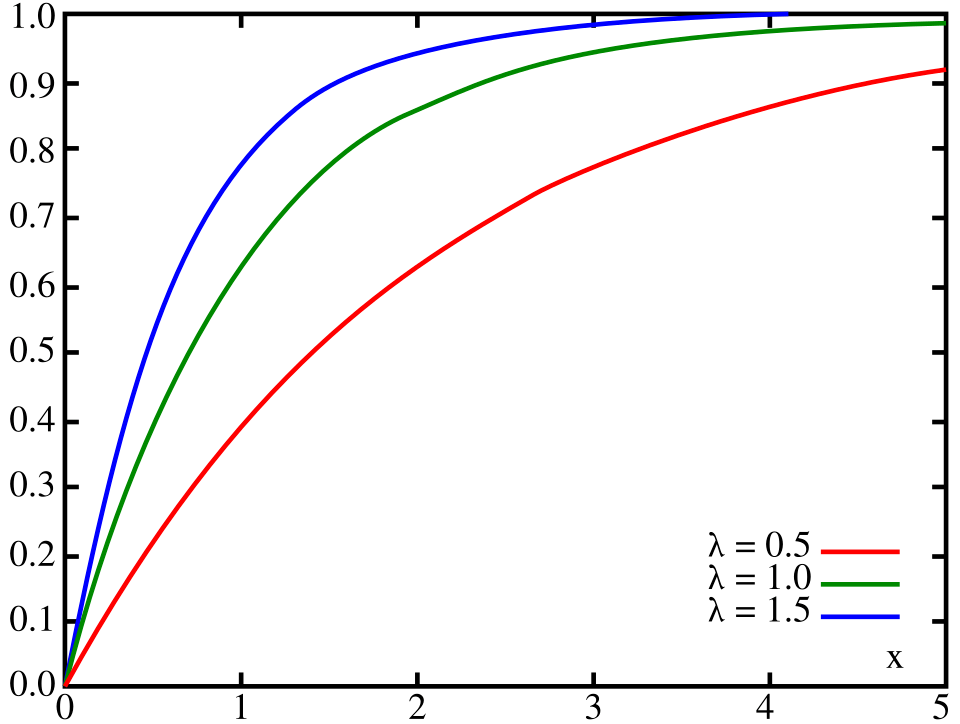

Cumulative distribution function for the normal distribution

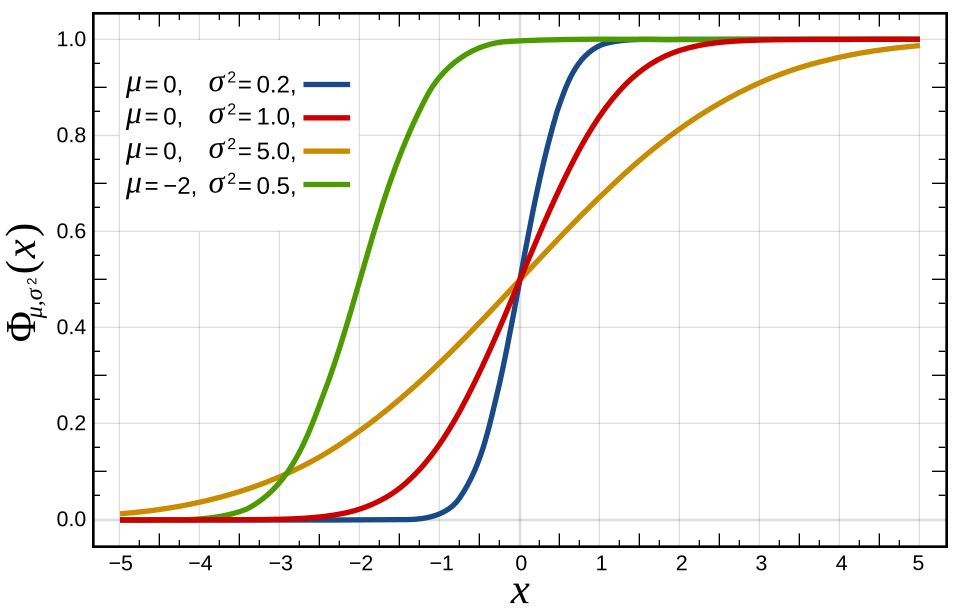

Now since we've noticed that a power-law is only likely to apply to the dataset if cutting off values < 100,000, let's use the powerlaw library and fit a function to do just that.

In [212]:
!pip install powerlaw


Fitting power-law distribution to data >= $100,000...
Calculating best minimal value for power law fit


Fitting xmin: 100%|██████████| 12162/12162 [02:19<00:00, 86.89it/s]  
/usr/local/lib/python3.12/dist-packages/powerlaw/distributions.py:808: UserWarning: Fitted parameters are very close to the edge of parameter ranges for distribution exponential; consider changing these ranges.
  warnings.warn(f'Fitted parameters are very close to the edge of parameter ranges for distribution {self.name}; consider changing these ranges.')


Power-law fit parameters for filtered data: Alpha = 1.4489, Xmin = 375000.00

Comparing power-law with log-normal distribution for filtered data...
Log-likelihood ratio (Power-law vs Log-normal) for filtered data: R = -235.9102, p = 0.0000

Comparing power-law with exponential distribution for filtered data...
Log-likelihood ratio (Power-law vs Exponential) for filtered data: R = 19815.4506, p = 0.0000


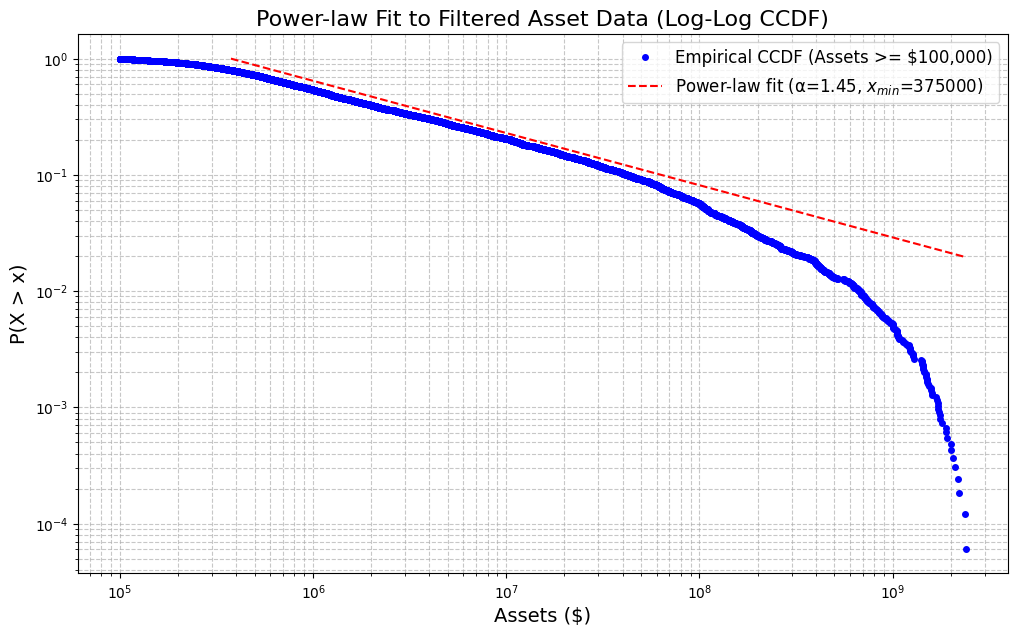

In [213]:
# Cut off all data below $100,000 and fit a power law to the remaining data

# Filter data for values >= $100,000
assets_filtered = assets_for_fitting[assets_for_fitting >= 100000]

# Fit power-law distribution to the filtered data
print("\nFitting power-law distribution to data >= $100,000...")
fit_powerlaw_filtered = powerlaw.Fit(assets_filtered)
print(f"Power-law fit parameters for filtered data: Alpha = {fit_powerlaw_filtered.alpha:.4f}, Xmin = {fit_powerlaw_filtered.xmin:.2f}")

# Compare power-law fit against a log-normal distribution for filtered data
print("\nComparing power-law with log-normal distribution for filtered data...")
R_lognormal_filtered, p_lognormal_filtered = fit_powerlaw_filtered.distribution_compare('power_law', 'lognormal')
print(f"Log-likelihood ratio (Power-law vs Log-normal) for filtered data: R = {R_lognormal_filtered:.4f}, p = {p_lognormal_filtered:.4f}")

# Compare power-law fit against an exponential distribution for filtered data
print("\nComparing power-law with exponential distribution for filtered data...")
R_exponential_filtered, p_exponential_filtered = fit_powerlaw_filtered.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio (Power-law vs Exponential) for filtered data: R = {R_exponential_filtered:.4f}, p = {p_exponential_filtered:.4f}")

# Visualize the power-law fit for the filtered data
plt.figure(figsize=(12, 7))

# Plot the empirical CCDF of the filtered asset data
powerlaw.plot_ccdf(assets_filtered, color='b', linestyle='None', marker='o', markersize=4, label='Empirical CCDF (Assets >= $100,000)')

# Overlay the fitted power-law distribution for filtered data
fit_powerlaw_filtered.power_law.plot_ccdf(color='r', linestyle='--', label=f'Power-law fit (α={fit_powerlaw_filtered.alpha:.2f}, $x_{{min}}$={fit_powerlaw_filtered.xmin:.0f})')

# Add labels and title
plt.xlabel('Assets ($)', fontsize=14)
plt.ylabel('P(X > x)', fontsize=14)
plt.title('Power-law Fit to Filtered Asset Data (Log-Log CCDF)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()

When we cut off low values and fit a powerlaw function to the remainder, we can see that it doesn't actually conform to it. Drop off occurs beyond 10^9 which shouldn't be expected in accordance with a powerlaw distribution. Limitations of the dataset should be considered, as only a handful of billionaires are likely to be included in a survey of this nature (we could see earlier that the highest net worth was ~2.4 billion, which is quite modest compared with the richest in the country). However based on the dataset available, I would feel somewhat confident saying that net worths *do not* follow a powerlaw distribution.

**Conclusion**</br>
Based on the data in the survey, the net worths of Americans follow a distribution with some characteristics of a powerlaw, especially for values greater than 100,000, but it would be wrong to say that they follow one, as confirmed by failure to fit a powerlaw function to any section of the data. However, analysis using a complementary cdf graph confirms that the data is indeed exponentially distributed.

[1] https://www.celebritynetworth.com/articles/billionaire-news/elon-musk-net-worth-2020/</br>
[2] https://www.bloomberg.com/billionaires/profiles/elon-r-musk/</br>
[3] https://www.nytimes.com/2025/11/06/business/elon-musk-tesla-pay-vote.html</br>
[4] https://www.statisticshowto.com/power-law/</br>
[5] https://en.wikipedia.org/wiki/Power_law</br>
[6] https://en.wikipedia.org/wiki/Cumulative_distribution_function</br>
